# $Crank–Nicolson$
In numerical analysis, the Crank–Nicolson method is a finite difference method used for numerically solving the heat equation and similar partial differential equations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def crank_A_mat(m, lambda_):

    mat_A = np.zeros((m + 1, m + 1))

    for i in range(m):
        mat_A[i][i] = 1 + lambda_
        mat_A[i][i+1] = - lambda_ * .5
        mat_A[i+1][i] = - lambda_ * .5

    mat_A[m][m] = 1 + lambda_
    return mat_A


def crank_B_mat(m, lambda_):
    mat_B = np.zeros((m + 1, m + 1))

    for i in range(m):
        mat_B[i][i] = 1 - lambda_
        mat_B[i][i + 1] = lambda_ * .5
        mat_B[i + 1][i] = lambda_ * .5
    mat_B[m][m] = 1 - lambda_
    return mat_B


def crank_call(w, A, B, k, w_m, w_0, nu, lambda_):

    d = np.zeros(len(w))

    d[0] = lambda_ / 2 * (w_0[nu] + w_0[nu + 1])
    d[-1] = lambda_ / 2 * (w_m[nu] + w_m[nu + 1])

    return np.linalg.inv(A).dot(B.dot(w) + d)


def get_call_maturity_condition(x_min, x_max, delta_x, k):

    x = np.arange(x_min, x_max + delta_x, delta_x)
    payoff = np.exp((k + 1) * x * .5) - np.exp((k - 1) * x * .5)

    return np.maximum(payoff, 0)

In [3]:
def crank_price_eu_call(K, T, r, sigma, x_min, x_max, delta_x, delta_tau):

    k = 2 * r / sigma ** 2
    tau_max = T * (sigma ** 2) * .5

    x = np.arange(x_min, x_max + delta_x, delta_x)
    m = int((x_max - x_min) / delta_x)

    lambda_ = delta_tau / (delta_x ** 2)
    tau_array = np.arange(0, tau_max + delta_tau, delta_tau)

    mat_A = crank_A_mat(m, lambda_)
    mat_B = crank_B_mat(m, lambda_)

    w = get_call_maturity_condition(x_min, x_max, delta_x, k)
    w_m = np.exp((k + 1) * x_max * .5 + ((k + 1) ** 2) * tau_array / 4)
    w_0 = np.zeros(len(w_m))

    for nu in range((len(w_m)) - 1):
        w = crank_call(w, mat_A, mat_B, k, w_m, w_0, nu, lambda_)

    alpha = (1 - k) * .5
    beta = - (k + 1) ** 2 / 4

    V = K * np.exp(alpha * x + beta * tau_max) * w
    S = K * np.exp(x)

    return S, V

In [4]:
def plot_crank_(r = 0.01, sigma = 0.3, K = 100, T = 1, x_min = -5, x_max = 5, delta_x = 0.01, delta_tau = 0.002):
    """
    Plots Cran
    """

    S, V = crank_price_eu_call(K, T, r, sigma, x_min, x_max, delta_x, delta_tau)

    plt.figure(figsize=(20,10))
    plt.plot(S[(S < 200) & (S > 10)], V[(S < 200) & (S > 10)],'C3',markersize=30,
         label= f'European Call Strike K={K}'.format(K))
    plt.legend(fontsize=20)
    plt.xlabel('Underlying Spot', color='white', fontsize=20)
    plt.grid()
    plt.show()

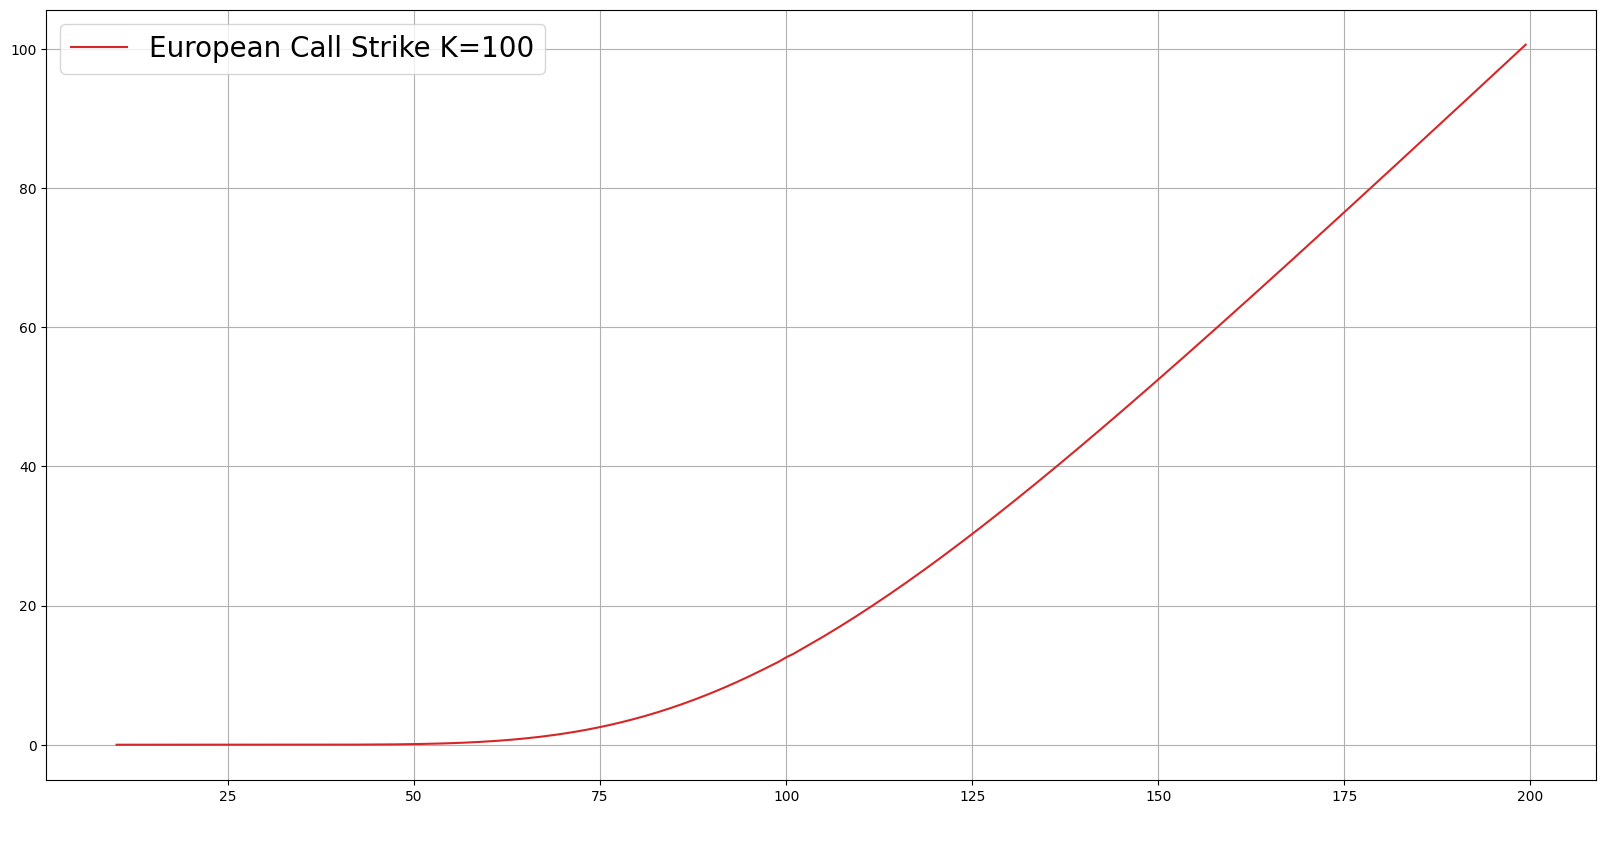

In [5]:
plot_crank_()